In [16]:
# Import packages.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle


# Import and preview data with complete views
filename = 'Lab2data.csv'
data = pd.read_csv(filename)
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)
display(data)

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,Cancer (All Sites),Colorectal Cancer,Diabetes-related,Firearm-related,Infant Mortality Rate,Lung Cancer,Prostate Cancer in Males,Stroke (Cerebrovascular Disease),Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,155.9,17.3,60.5,3.7,5.1,36.0,14.2,34.7,331.4,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,183.3,20.5,80.0,4.6,6.5,50.5,25.2,41.7,353.7,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,153.2,8.6,55.4,6.1,3.8,43.1,27.6,36.9,273.3,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,152.1,26.1,49.8,1.0,2.7,42.4,15.1,41.6,178.1,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5
5,6,Lake View,13.5,38.7,6.3,79.1,8.1,15.8,1.4,20.1,126.9,13.0,38.5,1.8,2.2,32.5,17.0,24.4,179.2,0.4,81.8,357.6,3.2,10.5,1.2,16.5,2.9,58227,4.7
6,7,Lincoln Park,13.2,38.7,6.6,75.7,7.8,2.1,0.7,23.7,152.9,16.7,50.1,2.3,2.4,40.0,27.3,35.3,173.3,0.6,50.3,93.1,1.2,11.8,0.6,20.4,4.3,71403,4.5
7,8,Near North Side,10.7,35.9,8.6,69.7,9.6,34.0,3.7,24.0,142.7,15.1,27.0,3.2,6.5,33.6,15.1,22.0,311.2,0.1,244.4,235.8,5.5,13.4,2.0,23.3,3.4,87163,5.2
8,9,Edison Park,11.3,59.5,7.9,86.6,12.6,3.9,0.0,13.8,189.7,15.1,53.0,7.1,4.6,45.2,28.0,38.9,134.7,0.0,NaN,.,1.8,5.1,0.6,36.6,8.5,38337,7.4
9,10,Norwood Park,10.4,59.6,4.9,89.4,8.3,3.4,4.7,20.7,180.8,18.9,47.3,8.7,4.4,44.5,26.4,45.2,163.1,0.0,NaN,.,1.6,5.9,2.3,40.6,13.5,31659,7.3


In [95]:
#Filter out and compare teen birth rate and per capita income
babyMoney = data[['Per Capita Income', 'Teen Birth Rate']]
#Display data for two columns
display(babyMoney)
#Calculate descriptive statistics and display
babyMoney.describe()

,Per Capita Income,Teen Birth Rate
0,23714,40.8
1,21375,29.9
2,32355,35.1
3,35503,38.4
4,51615,8.4
5,58227,15.8
6,71403,2.1
7,87163,34.0
8,38337,3.9
9,31659,3.4


,Per Capita Income,Teen Birth Rate
count,77.000000,77.000000
mean,25106.740260,50.064935
std,14952.672297,28.097817
min,8535.000000,1.300000
25%,15467.000000,33.700000
50%,20489.000000,49.200000
75%,29026.000000,67.900000
max,87163.000000,116.900000


In [96]:
#Normalize teen birth rate and per capita income
tbr = np.asarray(data['Teen Birth Rate'])
pci = np.asarray(data['Per Capita Income'])
tbrNorm = (tbr - tbr.min())/(np.ptp(tbr))
pciNorm = (pci - pci.min())/(np.ptp(pci))


#Create numpy array with normalized data
bmData = np.asarray(babyMoney)
for i in range(77):
    array = np.array([pciNorm[i], tbrNorm[i]])
    bmData[i] = array
       

print(tbrNorm)
print(pciNorm)
print("New Data Vector:")
print(bmData)

[0.3416955  0.24740484 0.29238754 0.32093426 0.06141869 0.12543253
 0.00692042 0.28287197 0.02249135 0.01816609 0.23615917 0.0432526
 0.07958478 0.37370242 0.34948097 0.30882353 0.16089965 0.52076125
 0.57871972 0.5916955  0.53719723 0.56055363 0.66262976 0.41435986
 0.69636678 0.98269896 0.7949827  0.30622837 0.93079585 0.65916955
 0.41262976 0.         0.42906574 0.12889273 0.28460208 0.46020761
 0.58737024 0.46280277 0.21107266 0.7032872  0.05449827 0.43079585
 0.55882353 0.57871972 0.54152249 0.65311419 0.58304498 0.32871972
 0.67820069 0.57612457 0.55363322 0.44723183 0.57525952 0.5467128
 0.39619377 0.28027682 0.42387543 0.49134948 0.40311419 0.23442907
 0.80449827 0.38235294 0.51989619 0.32352941 0.37456747 0.57179931
 1.         0.89965398 0.71799308 0.3200692  0.70761246 0.0916955
 0.55103806 0.05536332 0.39273356 0.12629758 0.11937716]
[0.19304828 0.16330061 0.30294552 0.34298214 0.54789642 0.6319886
 0.7995625  1.         0.37902528 0.29409371 0.23840108 0.41936715
 0.208653

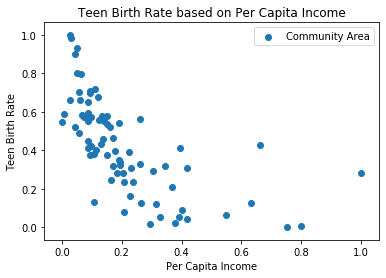

In [97]:
#Plot the data
plt.ion()
plt.scatter(bmData[:, 0], bmData[:, 1], label='Community Area')
plt.xlabel('Per Capita Income')
plt.ylabel('Teen Birth Rate')
plt.title('Teen Birth Rate based on Per Capita Income')
plt.legend()
plt.show()

Number of iterations: 
4

Labels: 
[2 2 2 2 1 1 1 1 2 2 2 2 2 0 2 2 2 0 0 0 0 0 3 2 3 3 3 2 3 3 0 1 1 2 2 0 0
 0 2 3 2 0 0 0 0 3 0 2 3 0 0 0 0 0 0 2 0 0 0 2 3 0 0 2 0 0 3 3 3 2 3 2 0 2
 0 2 2]

Cluster Means: 
[[0.11685532 0.49948097]
 [0.7323303  0.15095156]
 [0.27438769 0.21113674]
 [0.06575084 0.77792882]]

Jclust: 
1.3430157168960097



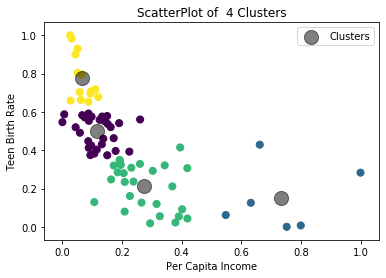

Group 1:
Humboldt Park
Austin
West Garfield Park
East Garfield Park
North Lawndale
South Lawndale
Washington Park
South Chicago
Roseland
New City
West Englewood
Englewood
Greater Grand Crossing
Auburn Gresham

Group 2:
Rogers Park
West Ridge
Uptown
Lincoln Square
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Portage Park
Irving Park
Dunning
West Town
Near West Side
Armour Square
Douglas
Kenwood
Hyde Park
Calumet Heights
Garfield Ridge
Bridgeport
Clearing
Ashburn
Beverly
Mount Greenwood
O'Hare
Edgewater

Group 3:
Albany Park
Montclaire
Belmont Cragin
Hermosa
Avondale
Logan Square
Lower West Side
Oakland
Fuller Park
Grand Boulevard
Woodlawn
South Shore
Chatham
Avalon Park
Burnside
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Archer Heights
Brighton Park
McKinley Park
West Elsdon
Gage Park
West Lawn
Chicago Lawn
Washington Heights
Morgan Park

Group 4:
North Center
Lake View
Lincoln Park
Near North Side
Loop
Near South Side


In [137]:
# Use kmeans to cluster vector into 4 groups

kmeans = KMeans(n_clusters = 4, random_state = 0).fit(bmData)
labels = kmeans.labels_
groupReps = kmeans.cluster_centers_
jClust = kmeans.inertia_

#Print number of iterations
print("Number of iterations: ")
print(kmeans.n_iter_)
print()
print("Labels: ")
print(labels)
print()
print("Cluster Means: ")
print(groupReps)
print()
print("Jclust: ")
print(jClust)
print()

#Plot clusters

plt.scatter(bmData[:, 0], bmData[:, 1], c = kmeans.predict(bmData), s = 50, cmap = 'viridis')
#plt.scatter()
plt.title("ScatterPlot of  4 Clusters")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Clusters');
plt.xlabel('Per Capita Income')
plt.ylabel('Teen Birth Rate')
plt.legend()
plt.show()

# Find neighborhoods in each cluster
nH = np.asarray(data['Community Area Name'])
print("Group 1:")
for i in range(len(labels)):
    if (labels[i] == 3):
        print(nH[i])
print()
print("Group 2:")
for i in range(len(labels)):
    if (labels[i] == 2):
        print(nH[i])
print()
print("Group 3:")
for i in range(len(labels)):
    if (labels[i] == 0):
        print(nH[i])
print()
print("Group 4:")
for i in range(len(labels)):
    if (labels[i] == 1):
        print(nH[i])


The dataset was cleaned to include 'Teen birth rates' and 'per capita income' levels. They were normalized and convereted to numpy arrays. Trying a few different cluster quantities, I settled on 4 because the other options did not show much better results, and the Jclust number wasn't getting any better. The kmeans algorithm ran 4 times to achieve the clusters. 

The normalized data shows that communities with higher per capita income have a lower teen birth rate and vice versa, the communities with lowest per capita income show the highest teen birth rates. Each community is grouped into one of four clusters, listed beneath the graph. Then comparing the cluster means to the graph, we can list the specific groups from left to right, which are listed underneath the graph. From this data, we can see directly which communities not only have the highest per capita income, but also the lowest teen birth rates. These areas, such as Lakeview, Lincoln Park, and the Loop are probably considered the nicer areas in the city. Whereas the poorest communities, such as Englewood, South Chicago, and Garfield Park have very low income levels and high teen birth rates. 

Perhaps one conclusion from this dataset would be that areas with high per capita income have less teen births. 

In [128]:
#Filter out and compare percentage of people without high school diplomas
#and number of assaults(homicides)
dumbKill = data[['No High School Diploma', 'Assault (Homicide)']]
#Display data for two columns
display(dumbKill)
#Calculate descriptive statistics and display
dumbKill.describe()

,No High School Diploma,Assault (Homicide)
0,18.1,7.7
1,19.6,5.8
2,13.6,5.4
3,12.5,5.0
4,5.4,1.0
5,2.9,1.4
6,4.3,0.7
7,3.4,3.7
8,8.5,0.0
9,13.5,4.7


,No High School Diploma,Assault (Homicide)
count,77.000000,77.000000
mean,21.596104,18.068831
std,12.354995,16.561077
min,2.900000,0.000000
25%,13.400000,4.900000
50%,18.500000,10.800000
75%,29.400000,32.200000
max,58.700000,70.300000


In [129]:
#Normalize teen birth rate and per capita income
hsd = np.asarray(data['No High School Diploma'])
ah = np.asarray(data['Assault (Homicide)'])
hsdNorm = (hsd - hsd.min())/(np.ptp(hsd))
ahNorm = (ah - ah.min())/(np.ptp(ah))


#Create numpy array with normalized data
dkData = np.asarray(dumbKill)
for i in range(77):
    array = np.array([hsdNorm[i], ahNorm[i]])
    dkData[i] = array
       

print(hsdNorm)
print(ahNorm)
print("New Data Vector:")
print(dkData)

[0.27240143 0.29928315 0.19175627 0.17204301 0.04480287 0.
 0.02508961 0.00896057 0.10035842 0.18996416 0.18996416 0.0609319
 0.27419355 0.5734767  0.28315412 0.34229391 0.27060932 0.45698925
 0.61111111 0.69892473 0.40860215 0.27956989 0.60752688 0.18817204
 0.39605735 0.41756272 0.41756272 0.14874552 0.49283154 1.
 0.74193548 0.00896057 0.07526882 0.62007168 0.25089606 0.26344086
 0.55197133 0.29569892 0.14157706 0.45519713 0.04301075 0.2688172
 0.21505376 0.19354839 0.18637993 0.45340502 0.28136201 0.14874552
 0.25985663 0.22759857 0.34050179 0.58422939 0.35304659 0.38888889
 0.2688172  0.29569892 0.60035842 0.81182796 0.51792115 0.40681004
 0.7078853  0.65770609 0.91756272 0.27956989 0.54659498 0.51433692
 0.49103943 0.47491039 0.2688172  0.27598566 0.29749104 0.03942652
 0.22759857 0.02867384 0.14336918 0.14516129 0.109319  ]
[0.10953058 0.08250356 0.07681366 0.07112376 0.01422475 0.01991465
 0.00995733 0.05263158 0.         0.06685633 0.06827881 0.04694168
 0.04267425 0.06685633 

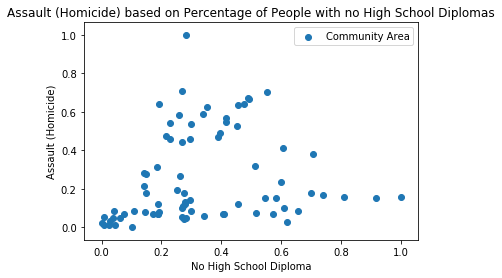

In [130]:
#Plot the data
plt.ion()
plt.scatter(dkData[:, 0], dkData[:, 1], label='Community Area')
plt.xlabel('No High School Diploma')
plt.ylabel('Assault (Homicide)')
plt.title('Assault (Homicide) based on Percentage of People with no High School Diplomas')
plt.legend()
plt.show()

This graphs shows the amount of homicides per community based on the percentage of people without high school diplomas. Looking at the data, it doesn't appear that much pattern can be discerned. One thing that looks evident is that areas where almost everyone has a high school diploma has very little homicide. While the rest of chicagoland seems to have quite a bit of homicide. More accurately, areas above the 0.15 threshhold all seem to have more cases of assault. However, it is a bit odd that the communities with the least high school diplomas do not have as much homicide. Mostly the middle percentage areas. 


Number of iterations: 
4

Labels: 
[0 0 0 0 3 3 3 3 3 0 0 3 0 2 0 0 0 2 2 1 2 0 2 0 4 4 4 0 4 1 1 3 3 2 0 0 4
 4 0 4 3 4 4 4 0 4 4 0 4 4 4 2 4 4 0 0 2 1 2 2 1 2 1 0 2 2 4 4 4 0 4 3 4 3
 0 3 3]

Cluster Means: 
[[0.23289699 0.13921702]
 [0.8130227  0.19914651]
 [0.54659498 0.14454536]
 [0.05307417 0.04212715]
 [0.35312805 0.58942196]]

Jclust: 
1.1754203082836758



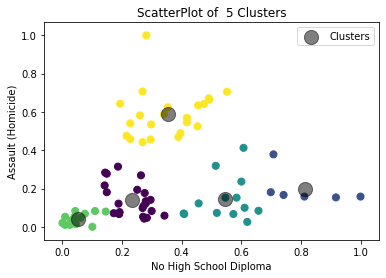

Group 1:
North Center
Lake View
Lincoln Park
Near North Side
Edison Park
Forest Glen
Loop
Near South Side
Hyde Park
Beverly
Mount Greenwood
O'Hare
Edgewater

Group 2:
Rogers Park
West Ridge
Uptown
Lincoln Square
Norwood Park
Jefferson Park
North Park
Portage Park
Irving Park
Dunning
Logan Square
West Town
Near West Side
Douglas
Oakland
Kenwood
Avalon Park
Calumet Heights
Hegewisch
Garfield Ridge
Clearing
Ashburn
Morgan Park

Group 3:
Austin
West Garfield Park
East Garfield Park
North Lawndale
Fuller Park
Grand Boulevard
Washington Park
Woodlawn
South Shore
Chatham
South Chicago
Burnside
Roseland
Pullman
South Deering
West Pullman
Riverdale
West Englewood
Englewood
Greater Grand Crossing
Auburn Gresham
Washington Heights

Group 4:
Albany Park
Montclaire
Belmont Cragin
Avondale
Humboldt Park
Armour Square
East Side
Archer Heights
McKinley Park
Bridgeport
West Elsdon
West Lawn
Chicago Lawn

Group 5:
Hermosa
South Lawndale
Lower West Side
Brighton Park
New City
Gage Park


In [170]:
# Use kmeans to cluster vector into 5 groups

kmeans2 = KMeans(n_clusters = 5, random_state = 0).fit(dkData)
labels = kmeans2.labels_
groupReps = kmeans2.cluster_centers_
jClust = kmeans2.inertia_

#Print number of iterations
print("Number of iterations: ")
print(kmeans.n_iter_)
print()
print("Labels: ")
print(labels)
print()
print("Cluster Means: ")
print(groupReps)
print()
print("Jclust: ")
print(jClust)
print()

#Plot clusters

plt.scatter(dkData[:, 0], dkData[:, 1], c = kmeans2.predict(dkData), s = 50, cmap = 'viridis')
#plt.scatter()
plt.title("ScatterPlot of  5 Clusters")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Clusters');
plt.xlabel('No High School Diploma')
plt.ylabel('Assault (Homicide)')
plt.legend()
plt.show()

# Find neighborhoods in each cluster
nH = np.asarray(data['Community Area Name'])
print("Group 1:")
for i in range(len(labels)):
    if (labels[i] == 3):
        print(nH[i])
print()
print("Group 2:")
for i in range(len(labels)):
    if (labels[i] == 0):
        print(nH[i])
print()
print("Group 3:")
for i in range(len(labels)):
    if (labels[i] == 4):
        print(nH[i])
print()
print("Group 4:")
for i in range(len(labels)):
    if (labels[i] == 2):
        print(nH[i])
print()
print("Group 5:")
for i in range(len(labels)):
    if (labels[i] == 1):
        print(nH[i])


In the analysis of the amount of assault (homicides) compared to the percentage of people without high school diplomas, 5 groupings were made using the kmeans algorithm, using 4 iterations to achieve the best clusters. Once again, using the cluster means array, we can see which groups are which in the graph. 

The green dots represent the area with the most high school graduates, which also has the lowest amount of homicides. This area includes nicer areas such as Lincoln Park and Lakeview.
The purple and light blue dots represent areas with less high school graduates but slightly higher homicide rates. The darker blue dots represent the areas with the least amount of high shool graduates, which also have a similar homicide count as the purple and light blue areas. The outlying group is the yellow group, which has the highest number of assaults, but an average amount of high school diplomas compared to the other areas. 

Looking at the communities in group 3, which has the highest number of assaults, it can be seen that these are all actually areas that are closer to each other and on the South Side of Chicago where crime is bad. These areas include Englewood, Garfield Park, and South Chicago.

Based on these findings we can see that group 1 are intellectual areas with low homicide rates. Groups 2, 4, and 5 have lower high school diploma rates, and higher assault rates. However the highest percentage of assaults happen in the areas of Group 3. While this group does not have the highest or lowest amount of high school graduates, it is clear that the area itself is very dangerous. 

In [143]:
#Filter out and compare the amount of people below poverty level in an area and cases of cancer
poorCancer = data[['Below Poverty Level', 'Cancer (All Sites)']]
#Display data for two columns
display(poorCancer)
#Calculate descriptive statistics and display
poorCancer.describe()

#Normalize teen birth rate and per capita income
bpl = np.asarray(data['Below Poverty Level'])
cas = np.asarray(data['Cancer (All Sites)'])
bplNorm = (bpl - bpl.min())/(np.ptp(bpl))
casNorm = (cas - cas.min())/(np.ptp(cas))


#Create numpy array with normalized data
pcData = np.asarray(poorCancer)
for i in range(77):
    array = np.array([bplNorm[i], casNorm[i]])
    pcData[i] = array
       
print("New Data Vector:")
print(pcData)

,Below Poverty Level,Cancer (All Sites)
0,22.7,176.9
1,15.1,155.9
2,22.7,183.3
3,9.5,153.2
4,7.1,152.1
5,10.5,126.9
6,11.8,152.9
7,13.4,142.7
8,5.1,189.7
9,5.9,180.8


New Data Vector:
[[0.33619211 0.33138856]
 [0.2058319  0.20886814]
 [0.33619211 0.36872812]
 [0.10977702 0.19311552]
 [0.06861063 0.18669778]
 [0.12692967 0.03967328]
 [0.14922813 0.19136523]
 [0.17667238 0.13185531]
 [0.03430532 0.40606768]
 [0.04802744 0.35414236]
 [0.05660377 0.51400233]
 [0.05145798 0.10851809]
 [0.15951973 0.13768961]
 [0.24013722 0.22170362]
 [0.15780446 0.28354726]
 [0.13207547 0.28763127]
 [0.08919383 0.41656943]
 [0.16638079 0.18028005]
 [0.26586621 0.18961494]
 [0.27444254 0.08809802]
 [0.19725557 0.08051342]
 [0.24185249 0.16686114]
 [0.50600343 0.53092182]
 [0.2161235  0.11376896]
 [0.40994854 0.82730455]
 [0.6380789  1.        ]
 [0.62778731 0.68086348]
 [0.31732419 0.47782964]
 [0.60891938 0.82497083]
 [0.42881647 0.04259043]
 [0.41337907 0.12368728]
 [0.13722127 0.        ]
 [0.13722127 0.28529755]
 [0.56089194 0.24970828]
 [0.39451115 0.873979  ]
 [0.60034305 0.23103851]
 [0.89879931 0.80980163]
 [0.432247   0.57292882]
 [0.34305317 0.44515753]
 [0.6174

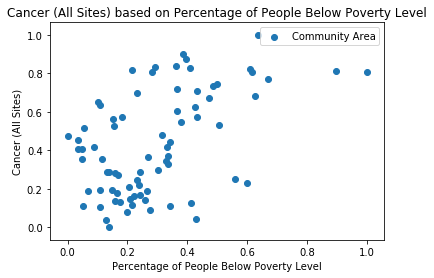

In [162]:
#Plot the data
plt.ion()
plt.scatter(pcData[:, 0], pcData[:, 1], label='Community Area')
plt.xlabel('Percentage of People Below Poverty Level')
plt.ylabel('Cancer (All Sites)')
plt.title('Cancer (All Sites) based on Percentage of People Below Poverty Level')
plt.legend()
plt.show()

This is a scatterplot of community areas and the amount of cancer cases based on the the percentage of people below the poverty level. There is a general upward movement of the dots, which shows that there is a slight pattern of places with less people belew poverty level having less cases of cancer than the areas with the most people below poverty levels. A linear trendline would have a positive slope in this case.

[ 2  9 30 36 39 45 47 52 58 75]
10
[0 8 0 9 9 9 8 8 1 1 6 9 9 8 1 1 1 8 8 8 8 8 5 8 7 4 4 0 4 2 2 9 1 2 7 2 3
 5 0 4 8 5 5 5 6 5 0 6 7 7 5 0 7 3 6 6 8 2 8 8 5 1 0 1 8 0 4 4 7 6 5 1 7 1
 6 9 8]


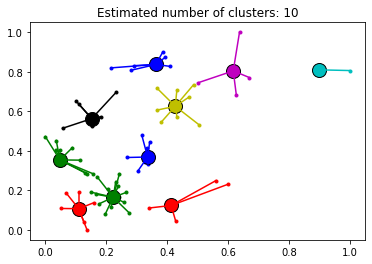

In [167]:
#Use affinity propagation to get number of clusters
af = AffinityPropagation().fit(pcData)

clusterCenterIndices = af.cluster_centers_indices_
numClusters = len(clusterCenterIndices)
labels = af.labels_

print(clusterCenterIndices)
print(numClusters)
print(labels)


plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(numClusters), colors):
    class_members = labels == k
    cluster_center = pcData[clusterCenterIndices[k]]
    plt.plot(pcData[class_members, 0], pcData[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in pcData[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % numClusters)
plt.show()

Affinity propagation results in 10 clusters. We can try to see if we can lower the number of clusters. Perhaps normalizing the data skews the algorithm a bit. 

[10 62 64 67 70]
5
[1 2 1 2 2 2 2 2 0 0 0 2 2 2 1 2 0 2 2 2 2 2 4 2 4 3 3 1 3 2 1 2 2 1 4 1 3
 4 1 3 2 4 4 4 4 4 1 0 4 4 4 1 4 3 0 0 2 2 2 1 4 0 1 0 2 1 4 3 4 0 4 0 4 0
 0 2 1]


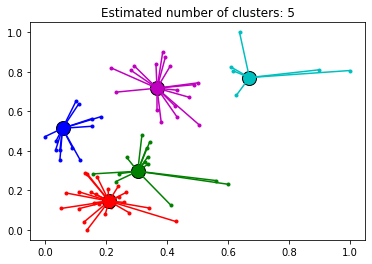

In [171]:
#Use affinity propagation to get number of clusters with set preference
#Set preference near minimal negative squared distance in dataset
af = AffinityPropagation(preference= -.5).fit(pcData)

clusterCenterIndices = af.cluster_centers_indices_
numClusters = len(clusterCenterIndices)
labels = af.labels_

print(clusterCenterIndices)
print(numClusters)
print(labels)


plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(numClusters), colors):
    class_members = labels == k
    cluster_center = pcData[clusterCenterIndices[k]]
    plt.plot(pcData[class_members, 0], pcData[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in pcData[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % numClusters)
plt.show()

Setting the preference to -.5 leads to 5 clusters which looks much better. 

Number of iterations: 
4

Labels: 
[0 1 0 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 0 1 4 3 3 0 3 1 1 1 1 0 4 0 3
 0 0 3 1 4 4 0 4 4 0 2 4 4 4 0 4 3 2 2 1 1 1 1 4 2 0 2 1 0 4 3 4 2 4 2 4 2
 2 1 1]

Cluster Means: 
[[0.38804592 0.39816893]
 [0.20151417 0.16305879]
 [0.0866869  0.48631182]
 [0.72310708 0.81388565]
 [0.37530017 0.75997666]]

Jclust: 
1.2522390306736588



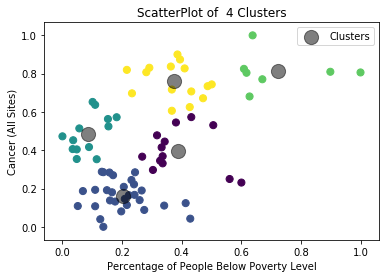

Group 1:
Edison Park
Norwood Park
Jefferson Park
Dunning
Calumet Heights
Hegewisch
Garfield Ridge
West Elsdon
Clearing
Ashburn
Beverly
Mount Greenwood
Morgan Park

Group 2:
West Ridge
Lincoln Square
North Center
Lake View
Lincoln Park
Near North Side
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Montclaire
Belmont Cragin
Hermosa
Avondale
Logan Square
West Town
South Lawndale
Lower West Side
Loop
Near South Side
Hyde Park
Archer Heights
Brighton Park
McKinley Park
Bridgeport
West Lawn
O'Hare
Edgewater

Group 3:
Austin
Douglas
Woodlawn
South Shore
Avalon Park
South Chicago
Roseland
Pullman
South Deering
West Pullman
New City
West Englewood
Greater Grand Crossing
Auburn Gresham
Washington Heights

Group 4:
Rogers Park
Uptown
Humboldt Park
Near West Side
Armour Square
Oakland
Grand Boulevard
Kenwood
Chatham
Burnside
East Side
Gage Park
Chicago Lawn

Group 5:
West Garfield Park
East Garfield Park
North Lawndale
Fuller Park
Washington Park
Riverdale
Englewood


In [173]:
# Use kmeans to cluster vector into 5 groups after affinity propagation

kmeans2 = KMeans(n_clusters = 5, random_state = 0).fit(pcData)
labels = kmeans2.labels_
groupReps = kmeans2.cluster_centers_
jClust = kmeans2.inertia_

#Print number of iterations
print("Number of iterations: ")
print(kmeans.n_iter_)
print()
print("Labels: ")
print(labels)
print()
print("Cluster Means: ")
print(groupReps)
print()
print("Jclust: ")
print(jClust)
print()

#Plot clusters

plt.scatter(pcData[:, 0], pcData[:, 1], c = kmeans2.predict(pcData), s = 50, cmap = 'viridis')
#plt.scatter()
plt.title("ScatterPlot of  4 Clusters")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Clusters');
plt.xlabel('Percentage of People Below Poverty Level')
plt.ylabel('Cancer (All Sites)')
plt.legend()
plt.show()

# Find neighborhoods in each cluster
nH = np.asarray(data['Community Area Name'])
print("Group 1:")
for i in range(len(labels)):
    if (labels[i] == 2):
        print(nH[i])
print()
print("Group 2:")
for i in range(len(labels)):
    if (labels[i] == 1):
        print(nH[i])
print()
print("Group 3:")
for i in range(len(labels)):
    if (labels[i] == 4):
        print(nH[i])
print()
print("Group 4:")
for i in range(len(labels)):
    if (labels[i] == 0):
        print(nH[i])
print()
print("Group 5:")
for i in range(len(labels)):
    if (labels[i] == 3):
        print(nH[i])


Once again, comparing the cluster means to the graph, we can see which dots represent which group and the communities within those groups. It seems apparent that the green dots, represent the worst area, with not only the highest percentage of people belwo the poverty level, but the highest number of cancer cases as well. These communites in group five are definitely some of the lowest income areas in Chicagoland, like Englewood, Fuller Park, and Garfield Park. It can also be seen that groups 1 and 3 also have higher rates of cancer, despite having less people below poverty rates. Looking at the communities in these groups, it looks like many of these communities are on the South Side, or on the edge of chicago's city limits. The South Side seems to have a lot of cancer cases, and there might be a lot of people without insurance as well. Groups 2 and 4 represent the communities with the lowest amount of cancer cases. These areas are closer to the center of chicago and are generally regarded as nicer areas. 

Overall, with these three charts of Chicagoland data, I think it can be seen that there are definitely nicer areas and lower class areas in chicago. The disparage can be noticed by geographical area if all the communities are mapped out. Richer areas near the loop, north side and west side seem to be wealthier, smarter, safer, and healthier; whereas areas like the south side, south west, and far west sides are the opposite. 